# Final Project
### Chloe Israel

## Introduction

This project examines a dataset, Student Performance Factors, and analyzes it using data science techniques to answer a series of research questions. By utilizing various different data manipulation and visualization techniques, the results of the analysis will be reported and the outlined research questions will be answered based on those results.

## Data Description 

The data set used is called Student Performance Factors, which was found on Kaggle (kaggle.com). It provides a comprehensive overview of various factors that affect student performance during exams. It has 6,607 rows and 20 variables. Of the variables, 10 are character variables, 7 are numerical variables, and 3 are Boolean variables. Each row represents one student, which is the data set's unit of observation. The variables represent a different factor that influences a student's success during exams. These include but are not limited to study habits, demographic information, and school quality. The students' exam scores are also provided as a metric to measure their performance. No changes were made to the data set. The data set is saved in the file 'StudentPerformanceFactors.csv'.

This dataset was chosen because it provides clear details about the factors that affect student performance. Many factors from socioeconomic status, health, school quality, and more can impact a student's grades. It is worth examining what has a positive or negative impact and how different factors relate to each other to help better understand why students perform well or don't. That knowledge will make it easier to effectively help students who are struggling.

#### Key Variables:
**Name**                   | **Data Type** | **Description**
:--------------------------|:--------------|:----------------
Attendance                 | integer       | Percentage of classes the student attended.                              
Access_to_Resources        | string        | Availability of educational resources to the student(Low/Medium/High).
Sleep_Hours                | integer       | Average number of hours of sleep the student gets per night. 
Previous_Scores            | integer       | Student’s scores from past exams.
Motivation_Level           | string        | Student’s motivation level (Low/Medium/High).
Teacher_Quality            | string        | Quality of the teachers at the student’s school (Low/Medium/High).
School_Type                | string        | Type of school the student attends (Public/Private)
Physical_Activity          | integer       | Average number of hours of physical activity the student gets per week.
Learning_Disabilities      | Boolean       | Indicates whether the student has a learning disability.
Exam_Score                 | integer       | Student’s final exam score.

## Research Questions

1. What is the relationship between the percentage of classes a student attends and a student’s exam scores, and does it differ based on the quality of the teachers at the school?

    **Variables:** Attendance, Exam_Score, Teacher_Quality

    This question explores the relationship between student attendance, exam scores, and teacher quality. The relationship between attendance and exam scores is worth exploring because it could give some insight into how factors that can indicate a student’s effort, like attending class, relate to their exam results. This will investigate the common belief that higher class attendance helps with a student’s learning. The additional exploration of teacher quality could provide insight into why students attend class and the level of learning they receive by attending. Teacher quality relates to both attendance and exam scores, so how does it relate to the relationship between the two variables?


2. Is there an association between the presence of a learning disability in a student and the student’s level of motivation?

    **Variables:** Learning_Disabilities, Motivation_Level

    This question explores the relationship between learning disabilities and motivation levels. In general, learning disabilities can make it difficult for a student to receive and retain information in a certain way. It’s worth exploring if students who may need to put in extra time to pay attention in class or understand information are motivated to do so. This relationship can also be extended to examine many other variables such as tutoring sessions, hours of sleep, or hours studied. This initial information provides important insights and helps with further exploration of this data set.


3. How do a student’s physical activity levels and hours of sleep per night relate to a student’s exam scores?

    **Variables:** Physical_Activity, Sleep_Hours, Exam_Score

    This question explores the relationship between physical activity, hours of sleep, and exam scores. The two variables physical activity and hours of sleep are commonly associated with a person’s wellness and both have certain levels that are considered healthy for student-aged individuals. Exploring the relationship between student wellness and exam scores will give insight into how students who fall in the healthy wellness range perform in school compared to those who do not.


4. What is the relationship between the availability of educational resources to a student and school type, and do these factors correlate with a student’s exam scores?

    **Variables:** Access_to_Resources, School_Type, Exam_Score

    This question explores the relationship between the availability of resources, school type (Public or Private), and exam scores. Often public schools will not have as many educational resources available to students compared to private schools. It’s worth investigating this notion to see if it is supported by data. Exploring how that relationship correlates with student exam scores can provide important information regarding the differences between the education of students of different socioeconomic levels.



## Analysis and Findings

### Analysis Preparation

In [1]:
# Load the needed libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data into the spf data frame.
spf = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
# Display the dataframe information.
spf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
# Display the column names.
spf.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [5]:
# Display the first 5 rows.
spf.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
# Copy the orginal dataframe into the df dataframe for modifications.
df = spf

Currently, the 3 Boolean variables "Extracurricular_Activities", "Internet_Access", and "Learning_Disabilities" hold the 
values Yes/No instead of the standard Boolean values True/False. To make it easier to group, filter, and work with these variables and 
to keep with standard Boolean conventions, these variable values will be changed to True/False.

In [7]:
# Use a loop to iterate through each value in the "Extracurricular_Activities", "Internet_Access", 
# and "Learning_Disabilities" columns. If the value if "Yes" change it to True. 
# If "No", change it to False.
loopLen = len(df["Extracurricular_Activities"])

for i in range(loopLen):
    if (df["Extracurricular_Activities"][i] == "Yes"):
        df.loc[i, "Extracurricular_Activities"] = True
    elif (df["Extracurricular_Activities"][i] == "No"):
        df.loc[i, "Extracurricular_Activities"] = False
        
    if (df["Internet_Access"][i] == "Yes"):
        df.loc[i, "Internet_Access"] = True
    elif (df["Internet_Access"][i] == "No"):
        df.loc[i, "Internet_Access"] = False
        
    if (df["Learning_Disabilities"][i] == "Yes"):
        df.loc[i, "Learning_Disabilities"] = True
    elif (df["Learning_Disabilities"][i] == "No"):
        df.loc[i, "Learning_Disabilities"] = False
        
# Check that the changes are correct.
df[["Extracurricular_Activities", "Internet_Access", "Learning_Disabilities"]].head()

,Extracurricular_Activities,Internet_Access,Learning_Disabilities
0,False,True,False
1,False,True,False
2,True,True,False
3,True,True,False
4,True,True,False


The student's test scores are provided by two variables, "Previous_Scores" and "Exam_Score". To have an easy metric to compare to other variables, the new variable "Average_Score" will be created by taking the average of the values is "Previous_Scores" and "Exam_Score".


In [8]:
# Create the Average_Score column in the df dataframe by taking the average of the 
# "Previous_Scores" and "Exam_Score" columns.
df["Average_Score"] = (df["Previous_Scores"] + df["Exam_Score"]) // 2

# Check the new column
df[["Previous_Scores", "Exam_Score", "Average_Score"]].head()

,Previous_Scores,Exam_Score,Average_Score
0,73,67,70
1,59,61,60
2,91,74,82
3,98,71,84
4,65,70,67


In [9]:
# Display the modified dataframe information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Research Question 1

In [10]:
# Determine the average attendance for a student
# Because the values in Attendance are whole numbers, the average attendance is rounded
# to remain consistent.
attendanceAvg = round(np.mean(df["Attendance"]))
print("The average percentage of classes students attend is {0}%\n".format(attendanceAvg)) 

# Using the above value, create two data frames, one holding students with attendance at or 
# above the average (satAtt) and one holding those below the average (unsatAtt).
satAtt = df[df["Attendance"] >= attendanceAvg]
unsatAtt = df[df["Attendance"] < attendanceAvg] 

The average percentage of classes students attend is 80%



In [11]:
# Check that satAtt holds the correct values.
print("satAtt dataframe:")
satAtt["Attendance"].head()

satAtt dataframe:


0    84
2    98
3    89
4    92
5    88
Name: Attendance, dtype: int64

In [12]:
# Check that unsatAtt holds the correct values.
print("unsatAtt dataframe:")
unsatAtt["Attendance"].head()

unsatAtt dataframe:


1     64
7     78
14    78
15    68
16    60
Name: Attendance, dtype: int64

In [13]:
# Determine the average score of student who have satisfactory attendance versus those who don't
# To more accurately see the differences between the average scores of the two groups, they
# are rounded to two decimal places.
print("Students with attendance at or above {0:.0f}% have an average exam score of {1:.2f}".format(attendanceAvg,
                                                                                         satAtt["Average_Score"].mean()))
print("Students with attendance below {0:.0f}% have an average exam score of {1:.2f}".format(attendanceAvg,
                                                                                         unsatAtt["Average_Score"].mean()))

Students with attendance at or above 80% have an average exam score of 71.71
Students with attendance below 80% have an average exam score of 70.07


These initial results show that, on average, students who have satisfactory attendance (above 80%) have higher exam scores than those who do not. How does this relationship change when examining it in relation to the quality of teachers at the school?

In [14]:
# Group the satAtt dataframe by "Teacher_Quality" and use the agg() function to display the
# average score and average attendance for each group.
# By default, groupby will drop the NaN values in Teacher_Quality.
satAttGrp = satAtt.groupby("Teacher_Quality").agg(
    Average_Score = ("Average_Score", "mean"),
    Avg_Attendance = ("Attendance", "mean")
    )

# Round the average scores to two decimal paces for readability and more accurate comparisons.
satAttGrp["Average_Score"] = satAttGrp["Average_Score"].round(2)
satAttGrp["Avg_Attendance"] = satAttGrp["Avg_Attendance"].round(2)

# Repeat the above code for the unsatAtt dataframe.
unsatAttGrp = unsatAtt.groupby("Teacher_Quality").agg(
    Average_Score = ("Average_Score", "mean"),
    Avg_Attendance = ("Attendance", "mean")
    )

unsatAttGrp["Average_Score"] = unsatAttGrp["Average_Score"].round(2)
unsatAttGrp["Avg_Attendance"] = unsatAttGrp["Avg_Attendance"].round(2)

# Display both dataframes, sorting from highest to lowest average score.
# Use the display function instead of print so the dataframe is shown as a formatted (and better looking) table.
print("Satisfactory Attendance:")
display(satAttGrp.sort_values(by = "Average_Score", ascending = False)) 

print("Unsatisfactory Attendance:")
display(unsatAttGrp.sort_values(by = "Average_Score", ascending = False))

Satisfactory Attendance:


,Average_Score,Avg_Attendance
Teacher_Quality,,
Low,72.27,90.09
High,71.77,89.56
Medium,71.58,89.88


Unsatisfactory Attendance:


,Average_Score,Avg_Attendance
Teacher_Quality,,
High,70.68,69.80
Low,70.04,69.63
Medium,69.76,69.90


These final results reinforce that students with higher attendance have higher exam scores. By extending this relationship to teacher quality, this shows that of the students who attend more classes, those with lower-quality teachers have higher exam scores. In contrast, students who attend fewer classes and those with higher-quality teachers have higher exam scores. For both attendance groups, students with medium-quality teachers have the lowest average exam scores, even if they attend more classes than the other groups. This is interesting, as the expected result was that for both attendance groups, the average score would increase as the teacher quality improved. These results could be interpreted that students who attend class learn more, resulting in better exam scores, and students who attend class learn less, resulting in lower exam scores. For those who have below-average class attendance, having a higher-quality teacher benefits their exam scores more than those who do. It's possible that because of their high-quality teachers, these students still learn and retain information despite missing class. It is reasonable to conclude that class attendance has a greater impact on student exam scores than teacher quality. Teacher quality will have a slight impact on a student's exam scores, and that impact becomes greater if they have below-average attendance.

### Research Question 2

The following analysis operates based on the recommendation from the National Sleep Foundation that adolescents require about 8-10 hours of sleep per night. 

https://www.thensf.org/what-to-know-about-teens-and-sleep/

In [15]:
# Find the unique values for "Sleep_Hours" and "Physical_Activity" to determine if they can be 
# easily grouped.
print("Unique Sleep Hours:", df["Sleep_Hours"].unique())
print("Unique Physical Activity:", df["Physical_Activity"].unique())

Unique Sleep Hours: [ 7  8  6 10  9  5  4]
Unique Physical Activity: [3 4 2 1 5 0 6]


In [16]:
# Based on the unique sleep hours, create a new column Sleep_Level and 
# divide the dataframe into segments.
# Very_Low: 4-5 hrs, Low: 6-7 hrs, Good: 8-10 hrs
# Source Used: GeeksforGeeks.org
df["Sleep_Level"] = pd.cut(df["Sleep_Hours"], [3, 5, 7, 10], labels = ["Very_Low", "Low", "Good"])

# Check that df has been divided correctly
df[["Sleep_Hours", "Sleep_Level"]].head()

,Sleep_Hours,Sleep_Level
0,7,Low
1,8,Good
2,7,Low
3,8,Good
4,6,Low


In [17]:
# Subset df into 3 separate dataframes for each Sleep_Level.
veryLow = df[df["Sleep_Level"] == "Very_Low"]
low = df[df["Sleep_Level"] == "Low"]
good = df[df["Sleep_Level"] == "Good"]

# Check each dataframe has been divided correctly (using the display function as in previous code).
display(good[["Sleep_Hours", "Sleep_Level"]].head())
display(low[["Sleep_Hours", "Sleep_Level"]].head())
display(veryLow[["Sleep_Hours", "Sleep_Level"]].head())

,Sleep_Hours,Sleep_Level
1,8,Good
3,8,Good
5,8,Good
9,8,Good
10,8,Good


,Sleep_Hours,Sleep_Level
0,7,Low
2,7,Low
4,6,Low
6,7,Low
7,6,Low


,Sleep_Hours,Sleep_Level
20,5,Very_Low
24,5,Very_Low
28,4,Very_Low
29,4,Very_Low
33,5,Very_Low


In [18]:
# Group each dataframe by "Physical_Activity" and use the agg function to calculate 
# the average exam score for each.
# Then, sort the information is descending order by Average_Score
# Also display the mean exam score for each sleep level
# Round the average scores to two decimal paces for readability and more accurate comparisons.
print("8-10 hours of sleep:")
print("Mean Exam Score:", good["Average_Score"].mean().round(2))
display(good.groupby(["Physical_Activity"]).agg({"Average_Score": "mean"}).round(2).sort_values(by = "Average_Score", ascending = False))

print("6-7 hours of sleep:")
print("Mean Exam Score:", low["Average_Score"].mean().round(2))
display(low.groupby(["Physical_Activity"]).agg({"Average_Score": "mean"}).round(2).sort_values(by = "Average_Score", ascending = False))

print("4-5 hours of sleep:")
print("Mean Exam Score:", veryLow["Average_Score"].mean().round(2))
display(veryLow.groupby(["Physical_Activity"]).agg({"Average_Score": "mean"}).round(2).sort_values(by = "Average_Score", ascending = False))

8-10 hours of sleep:
Mean Exam Score: 70.71


,Average_Score
Physical_Activity,
0,73.60
6,72.50
4,70.91
1,70.86
3,70.75
2,70.49
5,69.66


6-7 hours of sleep:
Mean Exam Score: 70.98


,Average_Score
Physical_Activity,
0,75.00
2,71.16
5,71.04
1,70.99
3,70.97
4,70.69
6,70.64


4-5 hours of sleep:
Mean Exam Score: 71.14


,Average_Score
Physical_Activity,
3,71.84
5,71.83
4,71.18
0,71.00
6,70.60
2,70.48
1,69.11


These preliminary results seem to indicate that students who get the recomended amount of sleep have the worst average exam performance, while those who get the least amount actually perform the best. This relationship will be discussed more later. As these results do not provide a clear relationship between sleep, physical activity, and exam scores, a line graph will be used to better visualize the correlation.

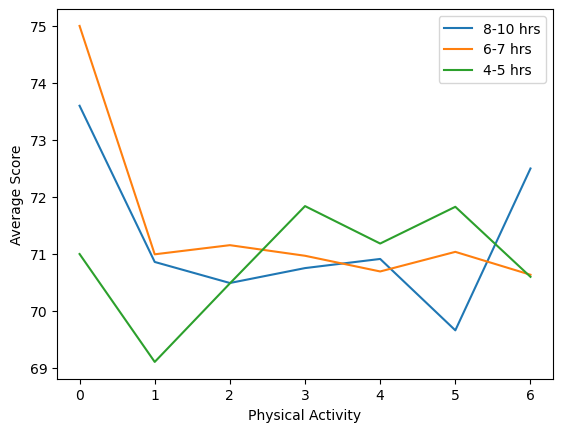

In [19]:
# To better visualize the relationship between Sleep, Physical Activity, and Exam Scores, create a grouped line graph.
# Group each sleep level by physical activity and get the mean average score for each group.
# Store the groups into 3 seperate dataframes used for the graph
goodDf = good.groupby('Physical_Activity')['Average_Score'].mean()
lowDf = low.groupby('Physical_Activity')['Average_Score'].mean()
veryLowDf = veryLow.groupby('Physical_Activity')['Average_Score'].mean()

# Graph each sleep group as thier own line
plt.plot(goodDf, label = "8-10 hrs")
plt.plot(lowDf, label = "6-7 hrs")
plt.plot(veryLowDf, label = "4-5 hrs")

# Show labels and the legend for clarity
plt.xlabel("Physical Activity")
plt.ylabel("Average Score")
plt.legend()

plt.show()

The graph above shows the relationship between physical activity (x-axis) and average exam scores (y-axis). Each line represents a different sleep level group, with the data points showing the average exam score of each group at different levels of physical activity. This visualization shows that, for levels of sleep 6 hours and above, students who have no physical activity have the best exam scores. For students who get 4-5 hours of sleep, those who get a moderate amount of physical activity have the best exam scores. For all the sleep levels, exam scores plummet from 0 hours to 1 hour of physical activity. It's also interesting to note that of the students who get 6 hours of physical activity, those who get the recommended amount of sleep have significantly better scores than those who do not. This visualization also reinforces the earlier relation found, where students who get the least amount of sleep have higher average scores. However, the 4-5 and 6-7 hour groups both have larger ranges and more extremes than the 8-10 group, which could indicate the presence of outliers skewing the data. To quickly check this assumption, a boxplot will be used to examine the distribution of the average exam score for each sleep group.

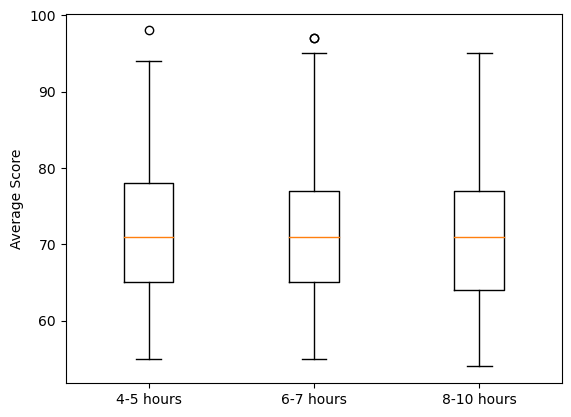

In [20]:
# Create a grouped boxplot to better examine the average exam scores for each sleep group.
plt.boxplot([veryLow["Average_Score"], low["Average_Score"], good["Average_Score"]],
           labels = ["4-5 hours", "6-7 hours", "8-10 hours"])

plt.ylabel("Average Score")
plt.show()

The visualization above shows that all three sleep groups have similar ranges and medians. However, the 4-5 and 6-7 hour group both have outliers as speculated. To more accurately visualize the relationship between sleep, physical activity, and exam scores, a new line graph will be generated using the median average score instead of the mean. In the case of using data with some skew, the median provides a more accurate representation.

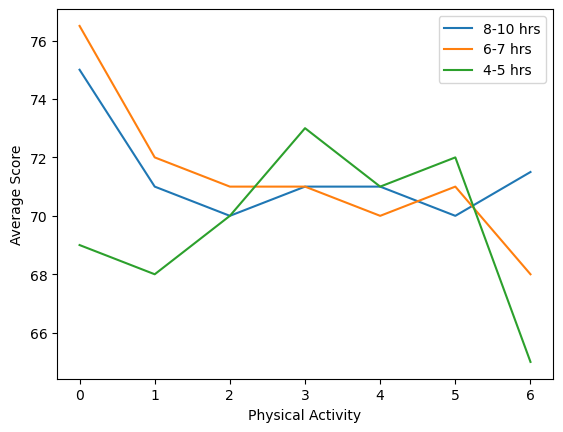

In [21]:
# Recreate the grouped line graph, using the median average score instead of the mean
goodDf = good.groupby('Physical_Activity')['Average_Score'].median()
lowDf = low.groupby('Physical_Activity')['Average_Score'].median()
veryLowDf = veryLow.groupby('Physical_Activity')['Average_Score'].median()

plt.plot(goodDf, label = "8-10 hrs")
plt.plot(lowDf, label = "6-7 hrs")
plt.plot(veryLowDf, label = "4-5 hrs")

plt.xlabel("Physical Activity")
plt.ylabel("Average Score")
plt.legend()

plt.show()

This new graph reinforces some of the conclusions made earlier based on the previous line graphs. Those who have a high amount of physical activity perform better if they get the recommended amount of sleep; those who sleep 6 hours or more and do no physical activity perform the best, and students who get 4-5 hours of sleep perform better if they get a moderate amount of physical activity. However, this graph more clearly shows that students who get a very low amount of sleep have more inconsistent exam performances overall. The 8-10 and 6-7 sleep groups follow fairly similar trends, but the 4-5 group differs tremendously and has considerably lower scores on the extreme ends of physical activity. A few conclusions can be made based on this data. Sleep has a meaningful impact on student performance, with those getting much less than the recommended amount performing worse or inconsistently compared to their peers who get more sleep. Physical activity only seems to play a significant role in this relationship at the extremes. Students who do absolutely no physical activity may have more time to focus on schoolwork, explaining the higher scores for those who get 6+ hours of sleep. Students who are extremely active would need more rest to recover their energy, and those who don't get that rest have worse exam grades as a result. What's interesting is that students who get a few hours less than the recommended amount of sleep perform slightly better than the ones that do. There could be many different explanations for this apparent trend. It's clear that sleep, physical activity, and wellness overall have a complicated relationship with a student's performance in school. It's something worth further exploration in the future.

### Research Question 3

In [22]:
# Filter df to only include the columns Motivation_Level and Learning_Disabilities.
# Store it in a temporary dataframe.
tempDf = df[["Motivation_Level", "Learning_Disabilities"]]

# Use the temporary data frame and filter it based on whether Learning_Disabilities is True or False.
# Store the results into the corresponding dataframe.
hasDisability = tempDf[tempDf["Learning_Disabilities"]]
noDisability = tempDf[tempDf["Learning_Disabilities"] == False]

# Check the contents of eah dataframe.
display(hasDisability.head())
display(noDisability.head())

,Motivation_Level,Learning_Disabilities
26,Medium,True
30,Medium,True
41,Low,True
43,Medium,True
54,Low,True


,Motivation_Level,Learning_Disabilities
0,Low,False
1,Low,False
2,Medium,False
3,Medium,False
4,Medium,False


With this data, finding the motivation level each student reports is the best way to investigate question 3. Because many more students in this dataset do not have a learning disability, finding the percentage of different motivations levels will ensure the results can be compared fairly.

In [23]:
# Calculate the percentage of students who reported either Low, Medium, or High motivation for each dataframe.
# Round the percentages for readability.
hasDisabilityMotivation = (hasDisability["Motivation_Level"].value_counts() / hasDisability["Motivation_Level"].count()) * 100
hasDisabilityMotivation = hasDisabilityMotivation.round(2)

noDisabilityMotivation = (noDisability["Motivation_Level"].value_counts() / noDisability["Motivation_Level"].count()) * 100
noDisabilityMotivation = noDisabilityMotivation.round(2)

# Display the results as a dataframe, sorted in descending order by count.
print("Motivation count for students with disabilities\n")
display(hasDisabilityMotivation.to_frame().sort_values(by = "count", ascending = False))

print("Motivation count for students without disabilities\n")
display(noDisabilityMotivation.to_frame().sort_values(by = "count", ascending = False))

Motivation count for students with disabilities



,count
Motivation_Level,
Medium,47.91
Low,30.79
High,21.29


Motivation count for students without disabilities



,count
Motivation_Level,
Medium,51.05
Low,29.14
High,19.81


The data above shows that students with and without learning disabilities have very similar motivation levels. Students with disabilities have slightly lower and slightly higher motivation levels. Students without disabilities tend to have a more moderate amount of motivation. This could indicate that the presence of a learning disability makes those students have more extreme feelings regarding doing well in school. They could be discouraged and feel less motivated or be encouraged and feel more motivated to do well despite their learning disability. Those without disabilities may not feel less or more motivated because of the lack of that extra factor impacting their learning. It is reasonable to conclude that the presence of a learning disability has a slight impact on a student's motivation level, with it causing these students to feel more extreme about performing well.

### Research Question 4

In [24]:
# Divide the data frame into 3 different data frames representing students with a low, medium, and high 
# availbility of educational resources.
lowAccess = df[df["Access_to_Resources"] == "Low"]
medAccess = df[df["Access_to_Resources"] == "Medium"]
highAccess = df[df["Access_to_Resources"] == "High"]

# Check the dataframe have been divided correctly.
display(lowAccess[["Access_to_Resources", "Average_Score"]].head())
display(medAccess[["Access_to_Resources", "Average_Score"]].head())
display(highAccess[["Access_to_Resources", "Average_Score"]].head())

,Access_to_Resources,Average_Score
6,Low,67
16,Low,62
25,Low,59
36,Low,77
47,Low,67


,Access_to_Resources,Average_Score
1,Medium,60
2,Medium,82
3,Medium,84
4,Medium,67
5,Medium,80


,Access_to_Resources,Average_Score
0,High,70
7,High,58
8,High,74
10,High,78
11,High,79


In [25]:
# Next, filter the 3 access dataframes into to only include public and private schools.
# For both school types, take the average exam score.
lowPub = lowAccess[lowAccess["School_Type"] == "Public"]["Average_Score"].mean()
lowPriv = lowAccess[lowAccess["School_Type"] == "Private"]["Average_Score"].mean()

medPub = medAccess[medAccess["School_Type"] == "Public"]["Average_Score"].mean()
medPriv = medAccess[medAccess["School_Type"] == "Private"]["Average_Score"].mean()

highPub = highAccess[highAccess["School_Type"] == "Public"]["Average_Score"].mean()
highPriv = highAccess[highAccess["School_Type"] == "Private"]["Average_Score"].mean()

# Display the average exam scores for public and private schools, for students with a low, medium, and high availbility
# of educational resources.
print("Public Schools: Low Access:", lowPub.round(2), "Medium Access:", medPub.round(2), "High Access:", highPub.round(2))
print("Private Schools: Low Access:", lowPriv.round(2), "Medium Access:", medPriv.round(2), "High Access:", highPriv.round(2))

Public Schools: Low Access: 69.94 Medium Access: 70.96 High Access: 71.65
Private Schools: Low Access: 70.19 Medium Access: 70.79 High Access: 71.13


This data shows that students perform best across public and private schools with a high amount of access to educational resources. And while public schools have the highest average exam score, they also have a wider range. On average, it seems the performance of students in private schools is more consistent, regardless of access to resources. To verify this assumption and better visualize the difference in student performance between public and private schools, bar graphs will be used.

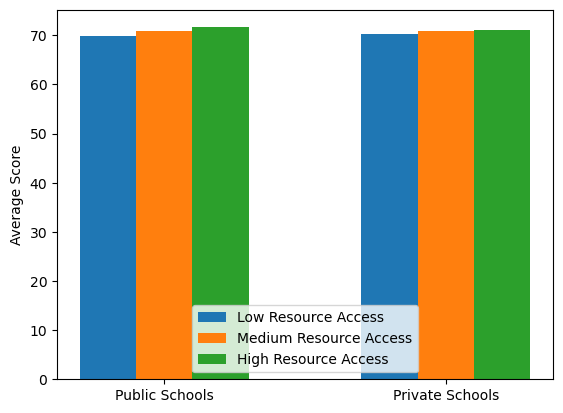

In [26]:
# Plot the differece between the average exam performance of students in public vs private schools.
schoolTypes = ["Public Schools", "Private Schools"]
xAxis = np.arange(len(schoolTypes)) / 2

plt.bar(xAxis - 0.10, [lowPub, lowPriv], 0.10) 
plt.bar(xAxis, [medPub, medPriv], 0.10) 
plt.bar(xAxis + 0.10, [highPub, highPriv], 0.10) 

plt.xticks(xAxis, schoolTypes)
plt.ylabel("Average Score")
plt.legend(["Low Resource Access", "Medium Resource Access", "High Resource Access"])
plt.show()

The chart above shows the relationship between school type (x-axis) and average exam scores (y-axis). The two school types are broken into three groups representing the level of access to educational resources the students have. There is a larger difference in performance between the educational resource groups for students in public school versus those in private school. This reinforces the earlier inference that students who attend private school have more consistent exam performances. Overall, as the level of educational resources increases, the average student exam grade increases. Based on this information, it can be concluded that access to educational resources has a positive effect on students' exam performances, this impact increasing if the students attend a public school. School type has a slight impact on student performance, but not one so significant that it can be said definitively that private schools are much better than public schools. Students who attend a public school but have other educational resources available to them have the ability to outperform the ones who attend a private school.

# Discussion

This project served to examine how various factors can impact a student's performance in school. The factors chosen provided insights into a student's level of effort in school, socioeconomic status, and physical and mental health. While they cannot paint the whole picture of a student, they can help us better understand what helps students succeed and how we can help them improve.

Based on the analysis of this dataset, the factors that impact a student's performance in school the most are their level of effort and health/well-being. When examining how a student's attendance relates to their grades, we saw a significant relationship, with students who attended class more often performing much better overall than those who did not. There was also a significant relationship between sleep and a student's performance, with those getting only 4-5 hours of sleep per night getting low and inconsistent exam scores. Comparatively, a student's socioeconomic status had a much less impactful relationship. Teacher quality and school type did not affect student performance as much as the other factors and were often secondary to things like effort. While access to educational resources did have a positive correlation to student performance, it can be argued that this factor is about a student's effort as well as socioeconomic status. A student can have educational resources available to them, but if they don't put in the effort to use said resources, they won't improve. Motivation plays a large part in effort. And a majority of students only have a medium level of motivation to do well in school, regardless of any detriments to their learning abilities. Perhaps by having a higher amount of educational resources available to them, students feel more motivated to put more effort into their learning. 

Using this understanding of what helps students perform better in school, we can better help students. Encouraging healthy sleeping habits is a good start, which can be done at school or at home. Assigning less work for students to do outside of class could also be helpful, so they can focus on their wellbeing. Most importantly, we need to be encouraging students to put effort into their learning. The best way to do this would be to make outside educational resources more available for them to use.